In [ ]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stats
from scipy import signal

import tabletop_pta as tpta

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# PTA Demo 1: Analyze reference metronome data files

The folowing demonstration notebook goes through the various commands needed to get profiles from single metronome observations and then to analyze the signal from double metronomes to get the correlations that reveal the motion of the recording microphone. All of the functionality is available in a GUI format by calling the commands `PTAdemo_single_metronome` and `PTAdemo_double_metronome`.

## Record single metronome pulses

In [3]:
# filenames and beats per minute
path = tpta.__path__ + '/demo_data/'
metfile1 = path + 'm208a'
metfile2 = path + 'm184b'
metfiles = path + 'm208a184b'
bpm1 = 208
bpm2 = 184

## Play recorded pulses

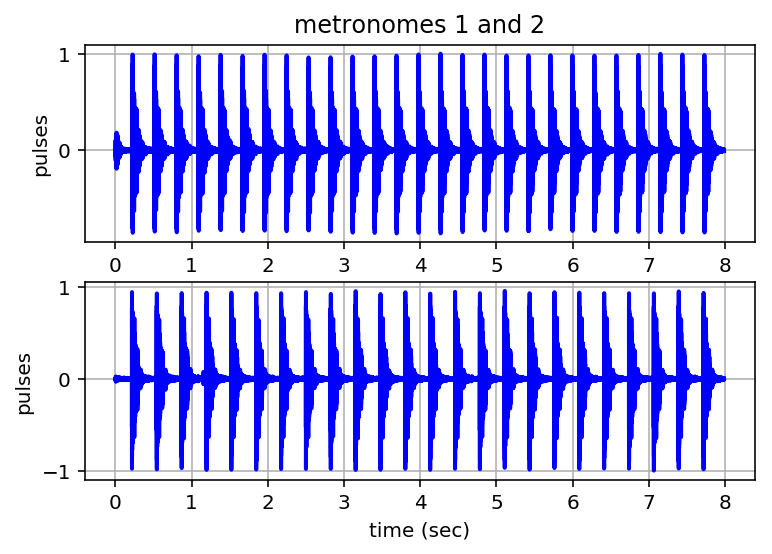

In [5]:
# sample rate
Fs = 44100

# play recorded sound
ts1 = tpta.playpulses(metfile1 + ".txt")
                                                        
# plot time series
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts1[:,0], ts1[:,1], lw=2, color='b')
plt.ylabel('pulses')
plt.title('metronomes 1 and 2')
plt.grid('on')

# play recorded sound
ts2 = tpta.playpulses(metfile2 + ".txt")

# plot time series
plt.subplot(2,1,2)
plt.plot(ts2[:,0], ts2[:,1], lw=2, color='b')
plt.xlabel('time (sec)')
plt.ylabel('pulses')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "_pulses.pdf", bbox_inches='tight')

## Calculate and Plot Pulse Profiles

calculating pulse period and profile of metronome 1...
T1 =  0.288561538462 sec
calculating pulse period and profile of metronome 2...
T2 =  0.326096956522 sec


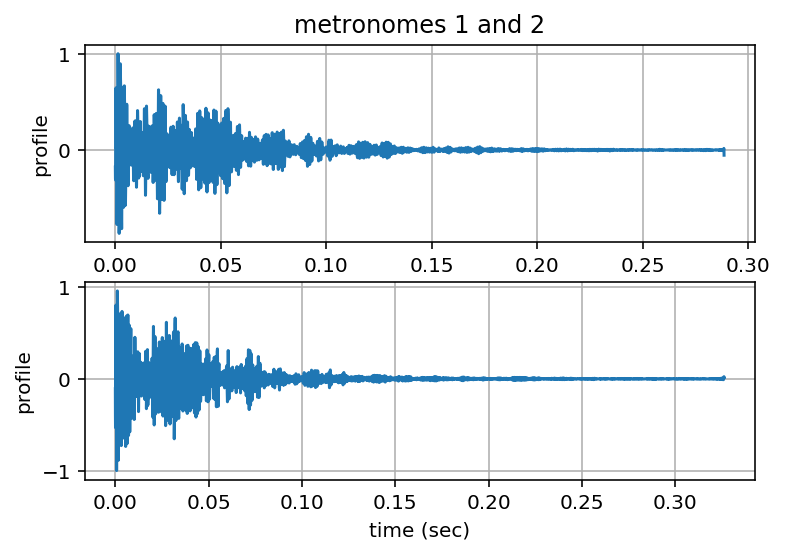

In [6]:
# metronome 1
print('calculating pulse period and profile of metronome 1...')
[profile1, T1] = tpta.calpulseprofile(ts1, bpm1)
print('T1 = ', T1, 'sec')

# plot pulse profile
plt.figure()
plt.subplot(2,1,1)
plt.plot(profile1[:,0], profile1[:,1])
plt.ylabel('profile')
plt.title('metronomes 1 and 2')
plt.grid('on')

# write pulse profile to file
outfile1 = metfile1 + "_profile_nb.txt"
np.savetxt(outfile1, profile1)

# metronome 2
print('calculating pulse period and profile of metronome 2...')
[profile2, T2] = tpta.calpulseprofile(ts2, bpm2)
print('T2 = ', T2, 'sec')

# plot pulse profile
plt.subplot(2,1,2)
plt.plot(profile2[:,0], profile2[:,1])
plt.xlabel('time (sec)')
plt.ylabel('profile')
plt.grid('on')
plt.draw()

# write pulse profile to file
outfile2 = metfile2 + "_profile_nb.txt"
np.savetxt(outfile2, profile2)

# print to file
plt.savefig(metfiles + "_profilesb_n.pdf", bbox_inches='tight')

## Zoom-in on Profiles

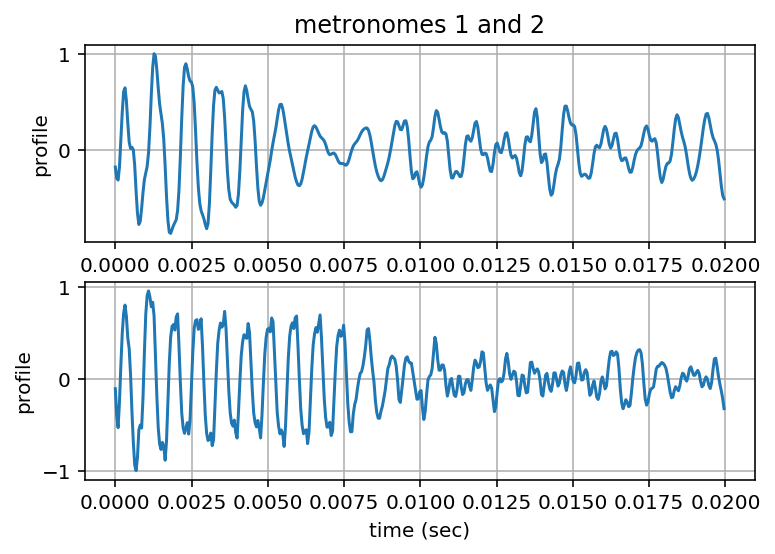

In [7]:
Nzoom = np.int(np.round(0.01*Fs))

plt.figure()
plt.subplot(2,1,1)
plt.plot(profile1[:Nzoom,0], profile1[:Nzoom,1])
plt.ylabel('profile')
plt.title('metronomes 1 and 2')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(profile2[:Nzoom,0], profile2[:Nzoom,1])
plt.xlabel('time (sec)')
plt.ylabel('profile')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "_profiles_zoom.pdf", bbox_inches='tight')

## Calculate Residuals

In [ ]:
# calculate residuals for metronome 1
template1 = tpta.caltemplate(profile1, ts1)
[measuredTOAs1, uncertainties1, n01] = tpta.calmeasuredTOAs(ts1, template1, T1)
Np1 = len(measuredTOAs1)
expectedTOAs1 = tpta.calexpectedTOAs(measuredTOAs1[n01-1], n01, Np1, T1)
[residuals1, errorbars1] = tpta.calresiduals(measuredTOAs1, expectedTOAs1, uncertainties1)

# calculate residuals for metronome 2
template2 = tpta.caltemplate(profile2, ts2)
[measuredTOAs2, uncertainties2, n02] = tpta.calmeasuredTOAs(ts2, template2, T2)
Np2 = len(measuredTOAs2)
expectedTOAs2 = tpta.calexpectedTOAs(measuredTOAs2[n02-1], n02, Np2, T2)
[residuals2, errorbars2] = tpta.calresiduals(measuredTOAs2, expectedTOAs2, uncertainties2)

## Plot Residuals

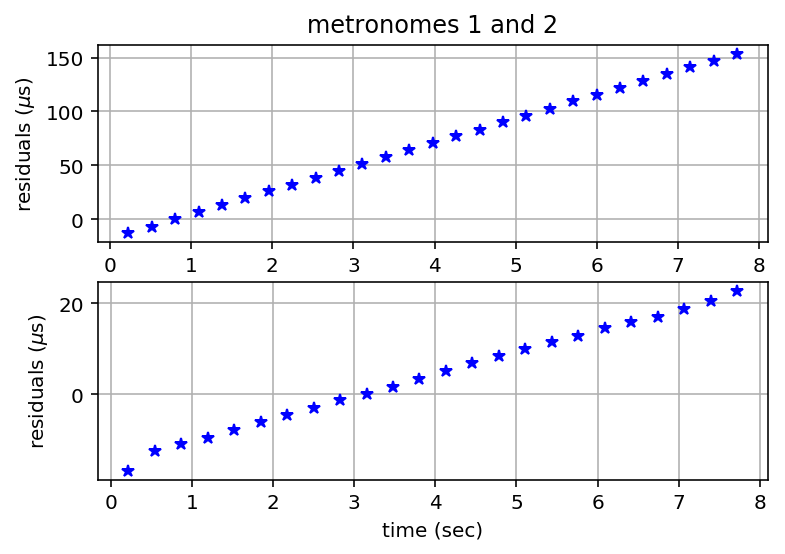

In [9]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(residuals1[:,0], 1.e6*residuals1[:,1], 'b*');
plt.ylabel('residuals ($\mu$s)')
plt.title('metronomes 1 and 2')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(residuals2[:,0], 1.e6*residuals2[:,1], 'b*');
plt.xlabel('time (sec)')
plt.ylabel('residuals ($\mu$s)')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "_residuals.pdf", bbox_inches='tight')

## Calculate and Plot Detrended Residuals

improved pulse period estimate of metronome 1 = 0.288567978601 sec
improved pulse period estimate of metronome 2 = 0.32609882891 sec


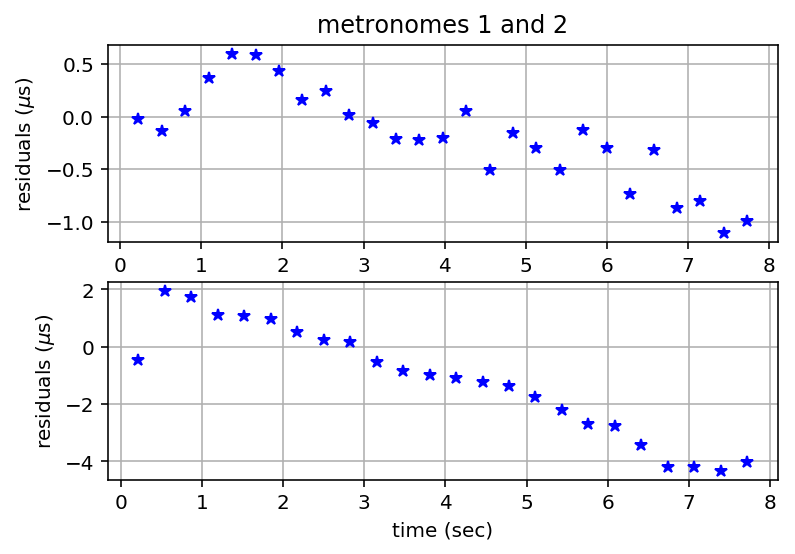

In [11]:
[dtresiduals1, b, m] = tpta.detrend(residuals1, errorbars1);
N1 = len(residuals1[:,0])
T1new = T1 + m*(residuals1[-1,0]-residuals1[0,0])/(N1-1)
print("improved pulse period estimate of metronome 1 =", T1new, "sec")

[dtresiduals2, b, m] = tpta.detrend(residuals2, errorbars2);
N2 = len(residuals2[:,0])
T2new = T2 + m*(residuals2[-1,0]-residuals2[0,0])/(N2-1)
print("improved pulse period estimate of metronome 2 =", T2new, "sec")

# plot residuals
plt.figure()
plt.subplot(2,1,1)
plt.plot(dtresiduals1[:,0], 1.e6*dtresiduals1[:,1], 'b*');
plt.ylabel('residuals ($\mu$s)')
plt.title('metronomes 1 and 2')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(dtresiduals2[:,0], 1.e6*dtresiduals2[:,1], 'b*');
plt.xlabel('time (sec)')
plt.ylabel('residuals ($\mu$s)')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(metfiles + "detrended_residuals.pdf", bbox_inches='tight')


# PTA Demo 2 - Double-Metronome Correlations

## Record Double-Metronome Data

In [16]:
# filenames (time-series and pulse profiles)
tsfile = 'm208a184b135'
profilefile1 = 'm208a_profile'
profilefile2 = 'm184b_profile'
T1 = T1new
T2 = T2new

In [12]:
#brecord pulses from both metronomes
tpta.recordpulses(tsfile + ".txt")

## Play Recorded Pulses

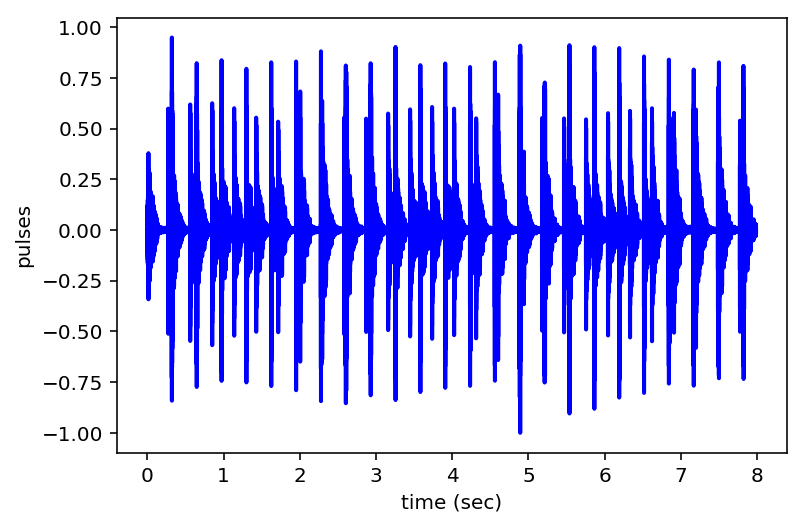

In [15]:
# play recorded sound

ts = tpta.playpulses(path + tsfile + ".txt")
                                                        
# plot time series
plt.figure()
plt.plot(ts[:,0], ts[:,1], lw=2, color='b')
plt.xlabel('time (sec)');
plt.ylabel('pulses');
plt.grid
plt.draw()

# print to file
plt.savefig(tsfile + "_pulses.pdf", bbox_inches='tight')

## Calculate Residuals

In [ ]:
# load pulse profiles
profile1 = np.loadtxt(profilefile1 + ".txt")
profile2 = np.loadtxt(profilefile2 + ".txt")

# calculate residuals for metronome 1
template1 = tpta.caltemplate(profile1, ts)
[measuredTOAs1, uncertainties1, n01] = tpta.calmeasuredTOAs(ts, template1, T1)
Np1 = len(measuredTOAs1)
expectedTOAs1 = tpta.calexpectedTOAs(measuredTOAs1[n01-1], n01, Np1, T1)
[residuals1, errorbars1] = tpta.calresiduals(measuredTOAs1, expectedTOAs1, uncertainties1)

# calculate residuals for metronome 2
template2 = tpta.caltemplate(profile2, ts)
[measuredTOAs2, uncertainties2, n02] = tpta.calmeasuredTOAs(ts, template2, T2)
Np2 = len(measuredTOAs2)
expectedTOAs2 = tpta.calexpectedTOAs(measuredTOAs2[n02-1], n02, Np2, T2)
[residuals2, errorbars2] = tpta.calresiduals(measuredTOAs2, expectedTOAs2, uncertainties2)

## Plot Residuals

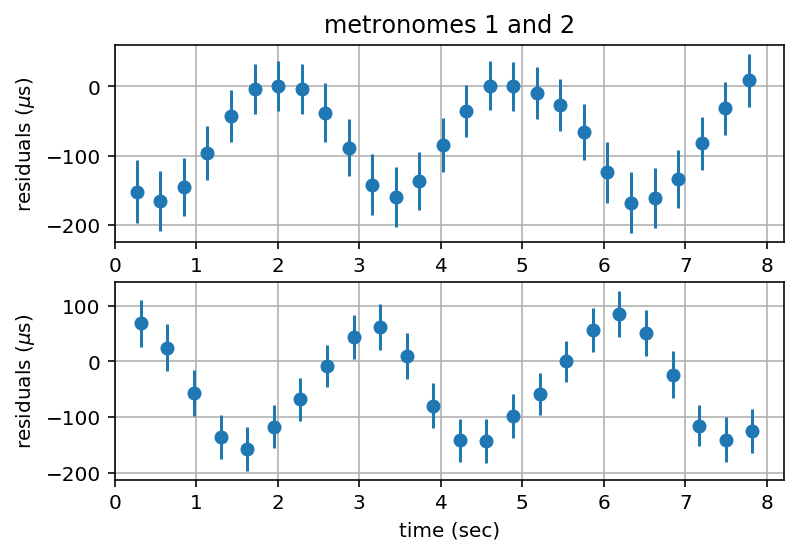

In [18]:
tlim = 1.05*max(residuals1[-1,0],residuals2[-1,0])

plt.figure()
plt.subplot(2,1,1)
plt.errorbar(residuals1[:,0], 1.e6*residuals1[:,1], 1.e6*errorbars1[:,1], fmt='o')
plt.xlim(0, tlim)
plt.ylabel('residuals ($\mu$s)')
plt.title('metronomes 1 and 2')
plt.grid('on')

plt.subplot(2,1,2)
plt.errorbar(residuals2[:,0], 1.e6*residuals2[:,1], 1.e6*errorbars2[:,1], fmt='o')
plt.xlim(0, tlim)
plt.xlabel('time (sec)')
plt.ylabel('residuals ($\mu$s)')
plt.grid('on')
plt.draw()

## Fit Sinusoid with Constant Offset to Residuals and Plot

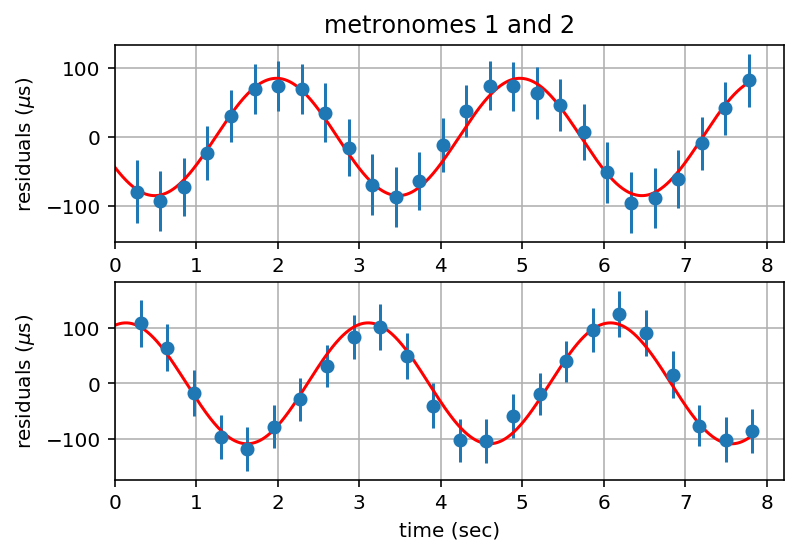

In [20]:
# default parameter choices
p1 = 2e-4
p2 = 0.4
p3 = 0
p4 = 0

#p1, p2, p3, p4  = input('input guess for amplitude, freq (Hz), phase (rad), offset (sec) for metronome 1: ')
pars1 = np.zeros(4)
pars1[0] = p1
pars1[1] = p2
pars1[2] = p3
pars1[3] = p4

pfit1, pcov1, infodict, message, ier = opt.leastsq(tpta.errsinusoid, pars1, args=(residuals1[:,0], residuals1[:,1], errorbars1[:,1]), full_output=1)

# default parameter choices
p1 = 2e-4
p2 = 0.4
p3 = 0
p4 = 0

#p1, p2, p3, p4  = input('input guess for amplitude, freq (Hz), phase (rad), offset (sec) for metronome 2: ')
pars2 = np.zeros(4)
pars2[0] = p1
pars2[1] = p2
pars2[2] = p3
pars2[3] = p4

pfit2, pcov2, infodict, message, ier = opt.leastsq(tpta.errsinusoid, pars2, args=(residuals2[:,0], residuals2[:,1], errorbars2[:,1]), full_output=1)

# best fit sinusoids
tfit = np.linspace(0, max(residuals1[-1,0], residuals2[-1,0]), 1024)
yfit1 = pfit1[0]*np.sin(2*np.pi*pfit1[1]*tfit + pfit1[2])
yfit2 = pfit2[0]*np.sin(2*np.pi*pfit2[1]*tfit + pfit2[2])

# constant offsets
N1 = len(residuals1[:,0])
N2 = len(residuals2[:,0])
offset1 = pfit1[3]*np.ones(N1)
offset2 = pfit2[3]*np.ones(N2)

# plot residuals with constants removed and with best fit sinusoids
plt.figure()
plt.subplot(2,1,1)
plt.errorbar(residuals1[:,0], 1.e6*(residuals1[:,1]-offset1), 1.e6*errorbars1[:,1], fmt='o')
plt.plot(tfit, 1.e6*yfit1, 'r-')
plt.xlim(0, tlim)
plt.ylabel('residuals ($\mu$s)')
plt.title('metronomes 1 and 2')
plt.grid('on')

plt.subplot(2,1,2)
plt.errorbar(residuals2[:,0], 1.e6*(residuals2[:,1]-offset2), 1.e6*errorbars2[:,1], fmt='o')
plt.plot(tfit, 1.e6*yfit2, 'r-')
plt.xlim(0, tlim)
plt.xlabel('time (sec)')
plt.ylabel('residuals ($\mu$s)')
plt.grid('on')
plt.draw()

# print to file
plt.savefig(tsfile + "_residuals.pdf", bbox_inches='tight')

## Calculate Correlation Coefficient

In [22]:
rhox, rhoy, rhoxy = tpta.calcorrcoeff(yfit1, yfit2)
print('correlation coeff = ', rhoxy)

correlation coeff =  -0.724534807671
